# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: David Büning

Datum: 19.11.2023

Gruppe: 13

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Welchen Einfluss hat das Hinzufügen von einer warmen Wassermenge zu einer kalten auf die Mischungstemperatur? 
Und wie lässt sich daraus die Wärmekapazität des kalten Behälters berechnen?

## Versuchsaufbau und Durchführung

Bei meinem Versuch hatte ich zwei Behälter vor mir. In beiden befand sich 500 ml Wasser und jeweils ein Sensor. Das Wasser in der Blechschale habe ich aufgeheizt während das kalte Wasser im Messbehälter aus dem Wasserhahn kam. Nachdem ich die Messung gestartet habe, habe ich die das heiße Wasser in den Messbehälter gegossen und den Sensor mitrutschen lassen, sodass am Ende das ganze Wasser und beide Sensoren im Messbehälter waren. Nach längerem Warten habe ich die Messung gestoppt.


![Versuchsaufbau Versuch 1](figures/Versuchsaufbau_Versuch1.jpeg)

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [17]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path  = "/home/pi/calorimetry_home/data/Experiment Capacity/data.h5"

# DONE #

In [80]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
#HDF5-Datei öffnen
import h5py
sensor_data = {}
with h5py.File(path, 'r') as file:
    #in Raw Data gehen
    raw_data_group = file['RawData']
    #Attribute der hdf5 Datei auslesen
    created_date = file.attrs.get('created')
    experiment = file.attrs.get('experiment')
    group_number = file.attrs.get('group_number')
    authors = file.attrs.get('authors')
    
    for sensor_uuid in raw_data_group:
        #Temperaturen auslesen und als Array laden
        temperature_dataset = raw_data_group[sensor_uuid]['temperatures']
        temperatures = temperature_dataset[()]
            
        #Zeitschritte auslesen und als Array laden
        timestamp_dataset = raw_data_group[sensor_uuid]['timestamps']
        timestamps = timestamp_dataset[()]

        #Attribute der Sensoren auslesen
        sensor_dataset = raw_data_group[sensor_uuid]
        sensor_name = sensor_dataset.attrs.get('name')
        sensor_serial = sensor_dataset.attrs.get('serial')
        #dict füllen mit uuids als keys
        sensor_data[sensor_uuid] = {'name': sensor_name, 'serial': sensor_serial, 'temperatures': temperatures, 'timestamps': timestamps}
file.close()
# DONE #

#### (ii) Daten ploten

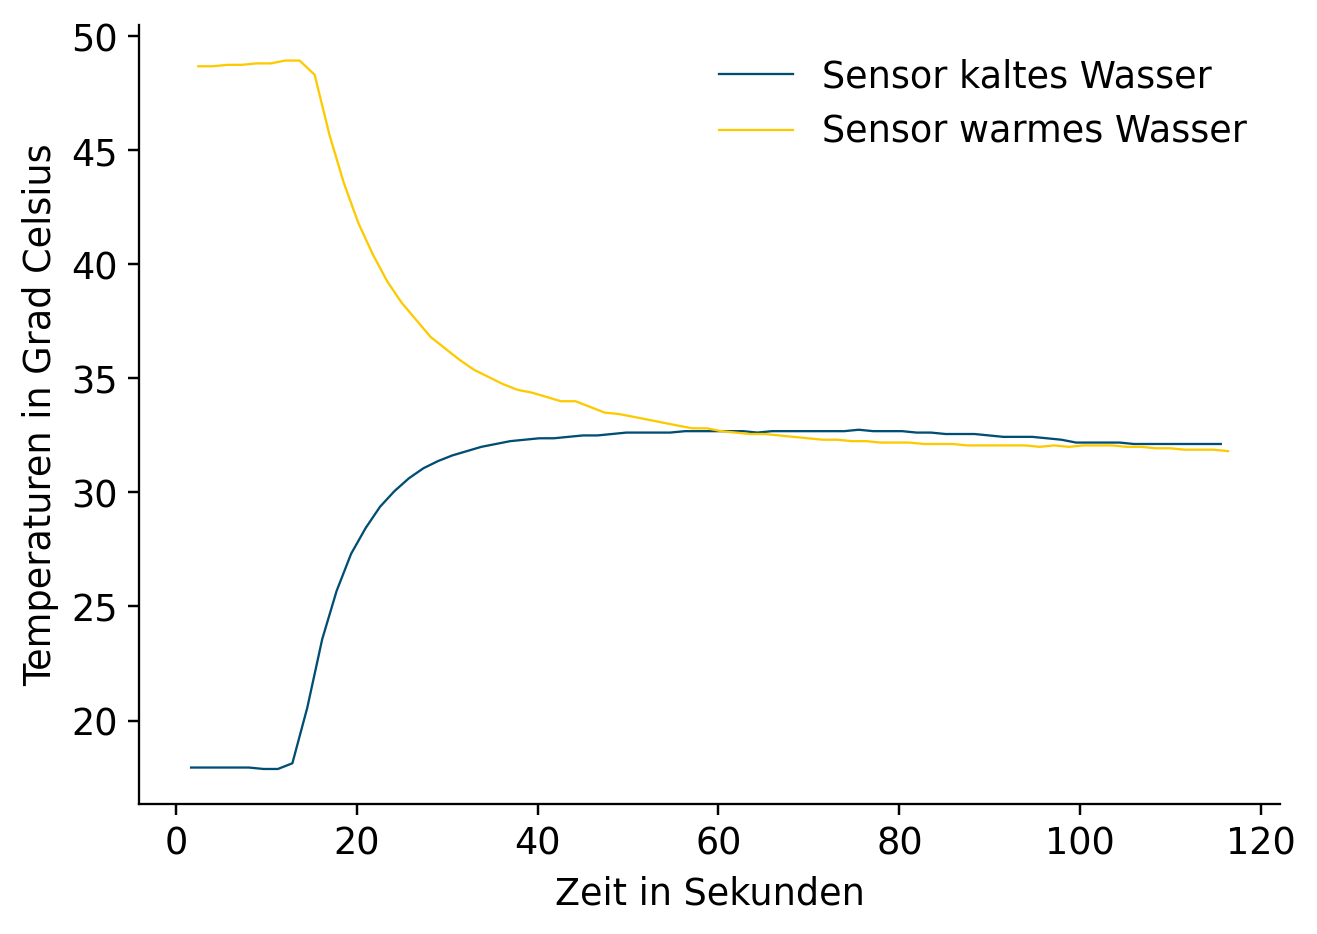

<Figure size 1471.8x1012 with 0 Axes>

In [85]:
# TODO: Use the temperature and time data for plotting
#uuids als Liste speichern
uuids = list(sensor_data.keys())

#Plotten von ersten Sensor (kalt)
temperatures1 = sensor_data[uuids[0]]['temperatures']
timestamps1 = sensor_data[uuids[0]]['timestamps']
plt.plot(timestamps1, temperatures1, label = 'Sensor kaltes Wasser')

#Plotten von zweiten Sensor (warm)
temperatures2 = sensor_data[uuids[1]]['temperatures']
timestamps2 = sensor_data[uuids[1]]['timestamps']
plt.plot(timestamps2, temperatures2, label = 'Sensor warmes Wasser')

#Diagramm beschreiben und anzeigen lassen
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperaturen in Grad Celsius')
plt.legend()
plt.show()

plt.savefig('Temperaturverläufe_Versuch1.svg')

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [61]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
#path zum Archiv festlegen
path_mass = "/home/pi/calorimetry_home/data/Experiment Capacity/archiv"
#Masse mithilfe get_json_entry auslesen
mass = m_json.get_json_entry(path_mass, '1ee82f63-1b0e-6d11-a1e7-6f439cfd7292', ['probe', 'mass'])

#m_add und m_cup als dezimalzahl festlegen, da mass ein string ist
m_add = float(mass)
m_cup = float(mass)

# DONE #

0.5
<class 'float'>


#### (iV) Anfangs- und Endwert der Temperatur

In [56]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
#Anfangstemperaturen von heißer und kalter Flüssigkeit festlegen (T_2 ist die wärmere)
T_2 = temperatures2[0]
T_1 = temperatures1[0]
#Endtemperaturen von beiden Sensoren und Mittelwert daraus berechnen
T_M_2 = temperatures2[-1]
T_M_1 = temperatures1[-1]
T_M = (T_M_2 + T_M_1)/2;

# DONE #

31.96875


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [83]:
# TODO: Calculate heat capacity of the calorimeter

# Formel mit vorherigen festgelegten Variablen ausrechnen
C = ((m_add * water_heat_capa * (T_2 - T_M))/(T_M - T_1)) - m_cup *  water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [82]:
# TODO: Print result

print("Experiment Informationen: Autor:", authors,"Gruppe:" ,group_number, "durchgeführt am", created_date)
print("Die Wärmekapazität des Behälters mit der kalten Flüssigkeit beträgt", C, "J/K")

# DONE #

Experiment Informationen: Autor: David Buening Gruppe: 13 durchgeführt am 18-11-2023 17:51:13
Die Wärmekapazität des Behälters mit der kalten Flüssigkeit beträgt 0.40031180400890864 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Das Experiment konnte nachweisen, dass sich die Mischungstemperatur zweier Flüssigkeiten unterschiedlicher Temperaturen zwischen den beiden Temperaturen der Flüssigkeiten befindet. Aus den Anfangstemperaturen und Endtemperaturen konnte man mithilfe des ersten Hauptsatzes der Thermodynamik die Wärmekapazität des Kalorimeters ausrechnen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Anhand dieses Versuches habe ich gelernt, das erste mal Daten von Sensoren auszumessen und zu plotten. Mithilfe dieser Daten war es mir möglich die Wärmekapazität eines Behälters zu berechnen. Ich konnte also einen thermodynamischen Vorgang quantifizieren, von dem ich mir vorher nie so wirklich genau etwas vorstellen konnte.